## What I Find
I use the groupby and mean filter to get the mean obesity per neighborhood. I then only print the bottom 3 so that I have a clear understanding of the best neighborhoods.

In [2]:
import pandas as pd
import geopandas
%matplotlib inline

In [14]:
# import dataset
cca = pd.read_csv("Obesity1.csv")
#### filter to important info
best = cca.groupby("neighborhood").mean()['obesity']
best.sort_values(ascending=True).head(3)

neighborhood
North Oakland          0.104579
North Shore            0.121487
Squirrel Hill North    0.125941
Name: obesity, dtype: float64

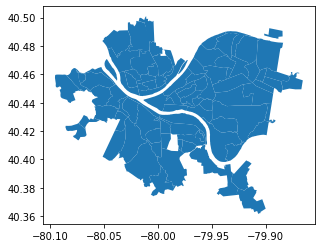

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [8]:
# do the merge
NBCT_map = neighborhoods.merge(cca, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
NBCT_map[['hood','obesity','geometry']].head()

,hood,obesity,geometry
0,Central Oakland,0.112780,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,Central Oakland,0.144556,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
2,North Oakland,0.070353,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
3,North Oakland,0.138806,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
4,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."


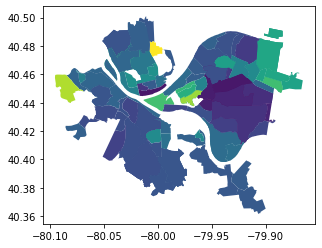

In [10]:
# draw a choropleth map using data from the column named "number_of_steps"
NBCT_map.plot(column='obesity')

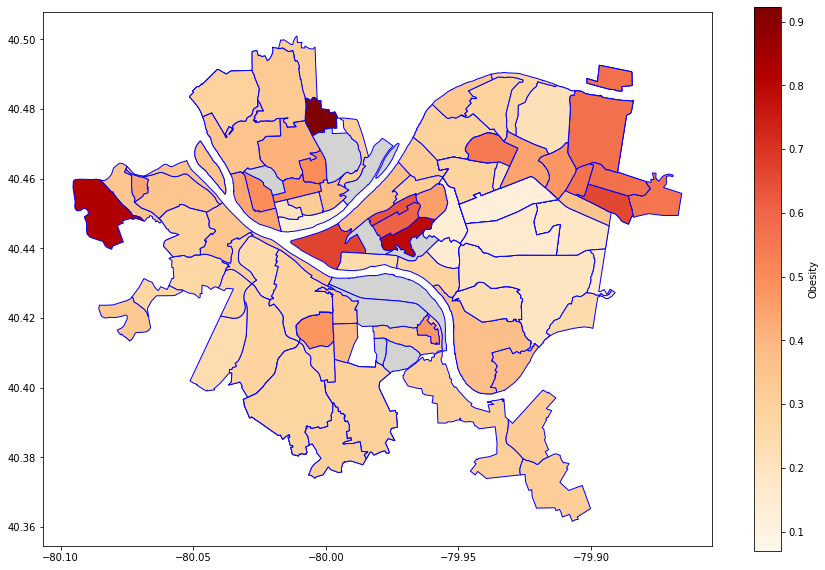

In [15]:
NBCT_map.plot(column='obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Obesity"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )